In [1]:
from eventregistry import *
import json, os, sys
import numpy as np
import time
import csv
import re
import pandas as pd
from bs4 import BeautifulSoup
import requests
import html
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
API_Key = "95cce15e-ec95-488a-aaca-fd1dd1a34fec" #Use your API Key
er = EventRegistry(apiKey = API_Key, allowUseOfArchive=False)

using user provided API key for making requests
Event Registry host: http://eventregistry.org
Text analytics host: http://analytics.eventregistry.org


#### We will look at the code for Microsoft (Wordcloud and Top 10 Keywords).

In [9]:
q = QueryArticles(conceptUri = er.getConceptUri("Microsoft"), lang = "eng", dataType = ['news','pr'])
q.setRequestedResult(RequestArticlesKeywordAggr(articlesSampleSize = 5000))
res2 = er.execQuery(q)

In [10]:
keywords = []
weights = []
r = re.compile(r'[a-zA-Z].*')
l = res2['keywordAggr']['results']

for i in range(len(l)):
    key = l[i]['keyword']
    wt = l[i]['weight']
    
    a = r.search(key)
    if(a != None):
        keywords.append(key) 
        weights.append(wt)

#### We create the word cloud here.

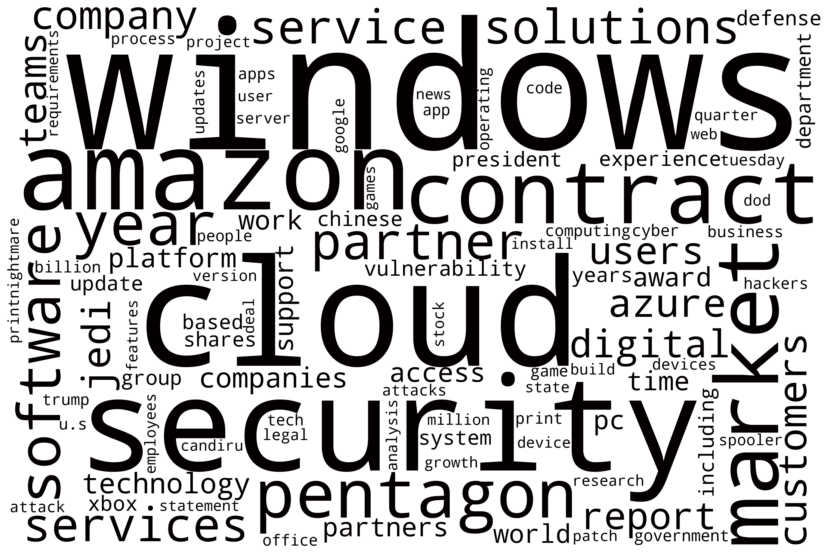

In [11]:
def black_color_func(word, font_size, position, orientation, random_state = None, **kwargs):
    return("hsl(0,100%, 1%)")

d = {}
for i in range(len(keywords)):
    d[keywords[i]] = weights[i]
    
wordcloud = WordCloud(background_color = "white", width = 3000, height = 2000).generate_from_frequencies(d)
wordcloud.recolor(color_func = black_color_func)
plt.figure(figsize = [15,10])
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")

s = ''
s = 'Microsoft' + '_Keywords_image.png'

plt.savefig(s)

#### Now we print the Top 10 Keywords.

In [12]:
for i in range(10):
    print(keywords[i])

windows
cloud
security
amazon
contract
market
pentagon
year
software
partner


#### Now we will look at the Top 10 companies.

#### fortune2021.csv holds the data of the Fortune 1000 companies from which we store the name of the companies in comp.

In [13]:
df = pd.read_csv("fortune2021.csv")
comp = df['company'].to_list()
rank = df['rank'].to_list()

------ Walmart ------
Top 10 Keywords - Walmart 
amazon
company
police
people
flipkart
insulin
products
companies
health
stores
------ Amazon ------
Top 10 Keywords - Amazon 
bezos
space
company
products
market
origin
blue
customers
bitcoin
digital
------ Apple ------
Top 10 Keywords - Apple 
iphone
app
market
ipad
battery
year
ios
quarter
company
report
------ CVS Health ------
Top 10 Keywords - CVS Health 
opioid
products
counties
trial
johnson
pharmacy
benzene
york
stock
market
------ UnitedHealth Group ------
Top 10 Keywords - UnitedHealth Group 
earnings
quarter
health
stock
unitedhealthcare
market
shares
companies
million
healthcare
------ Berkshire Hathaway ------
Top 10 Keywords - Berkshire Hathaway 
gates
foundation
market
munger
billion
buffett
paytm
stock
tax
french
------ McKesson ------
Top 10 Keywords - McKesson 
market
johnson
york
settlement
trial
deal
state
billion
money
opioid
------ AmerisourceBergen ------
Top 10 Keywords - AmerisourceBergen 
york
distribution
trial

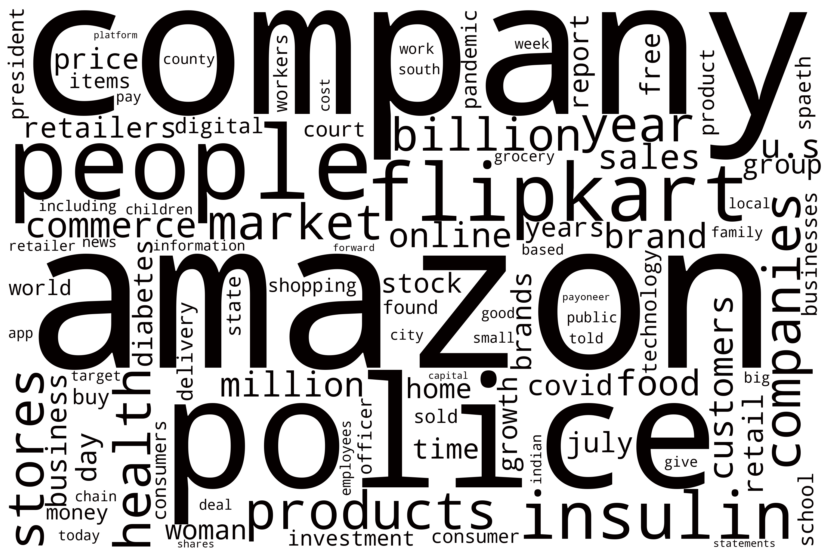

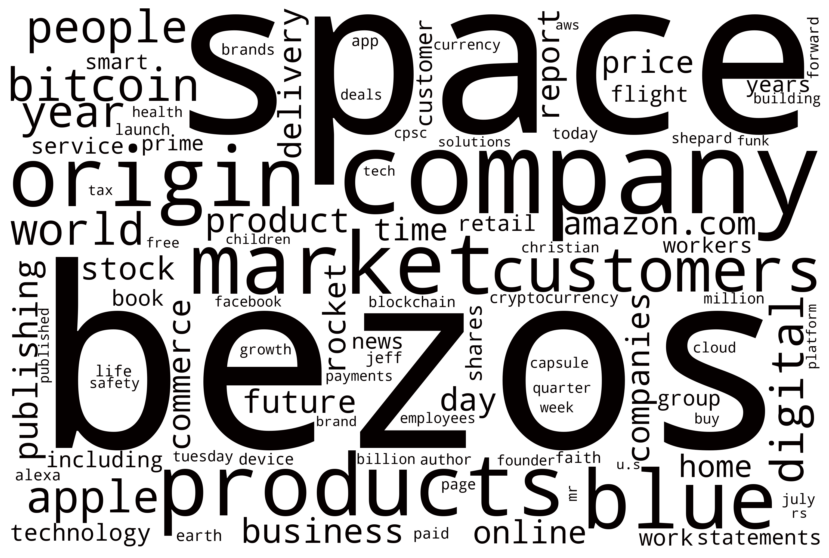

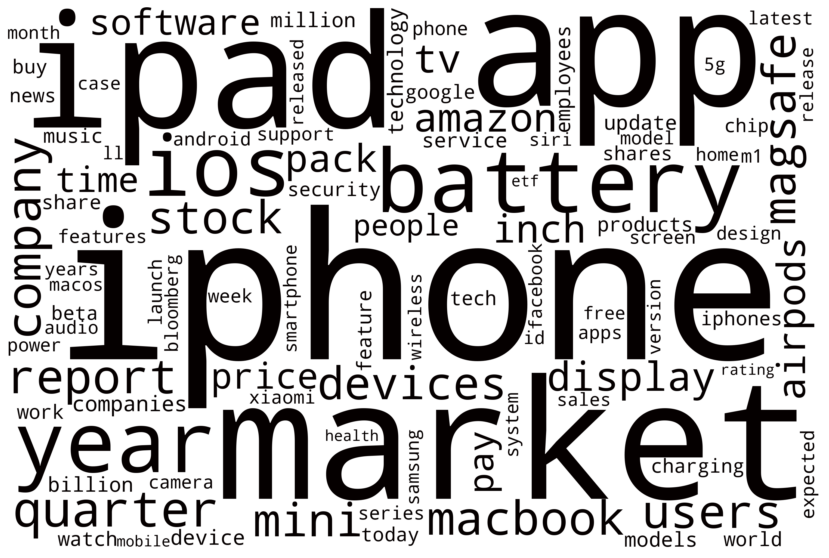

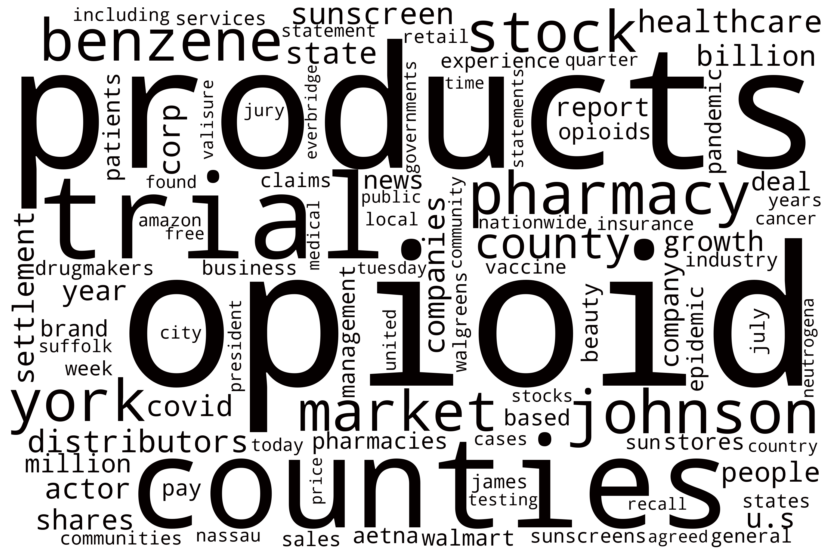

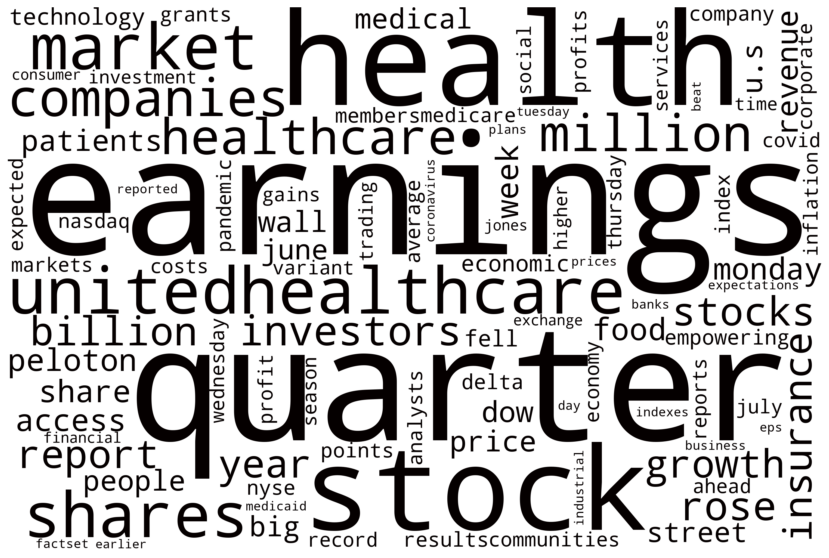

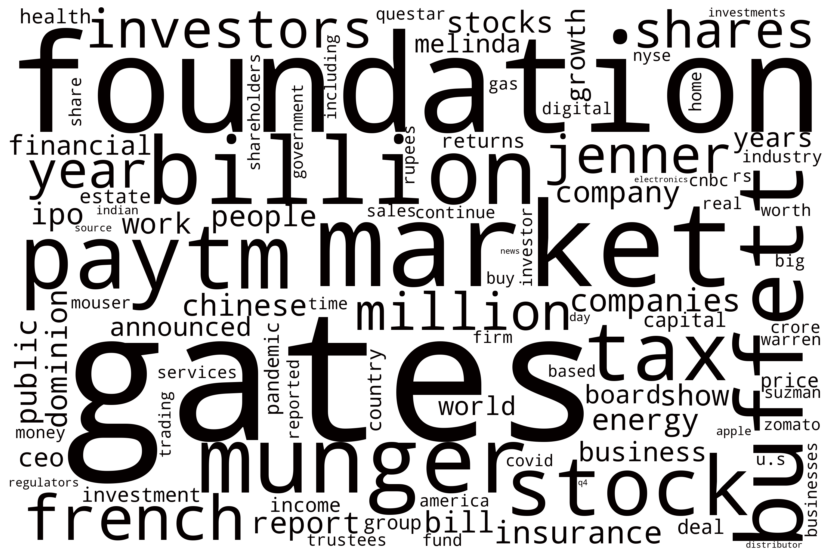

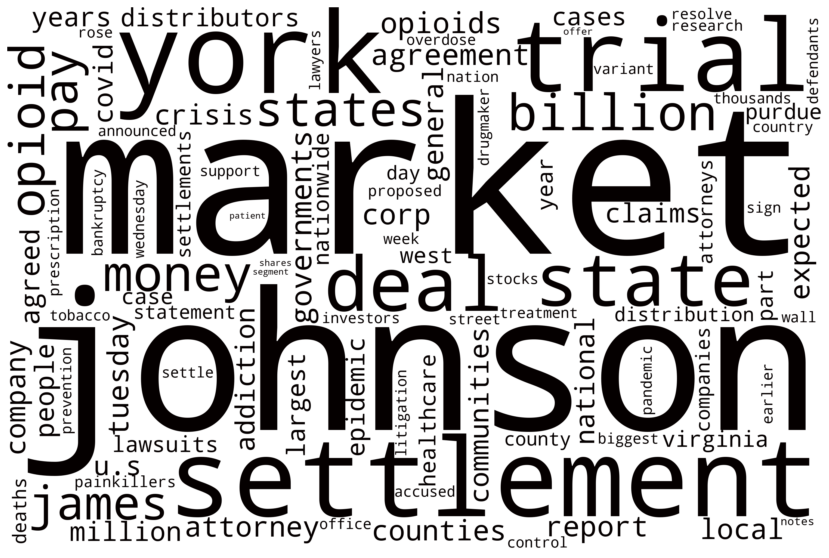

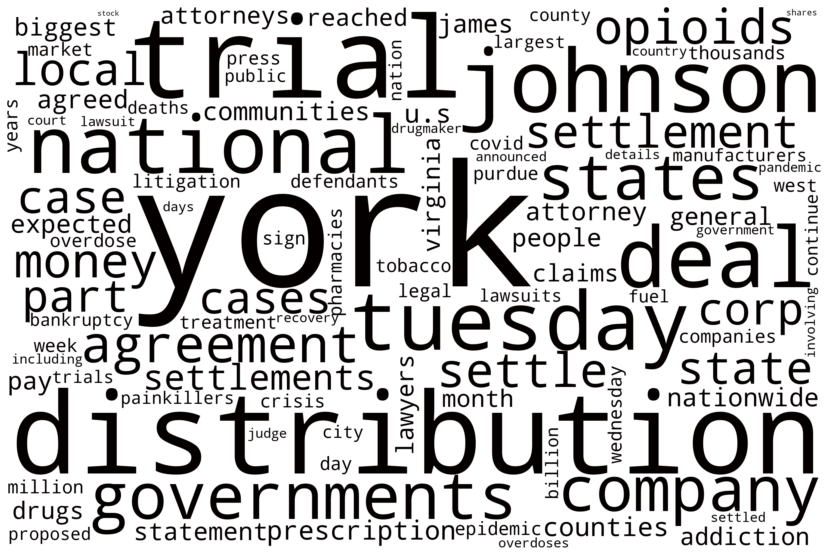

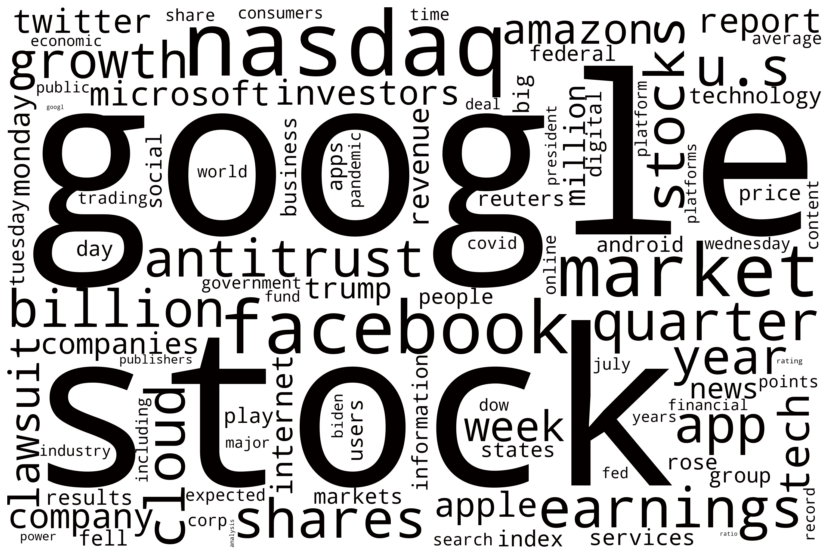

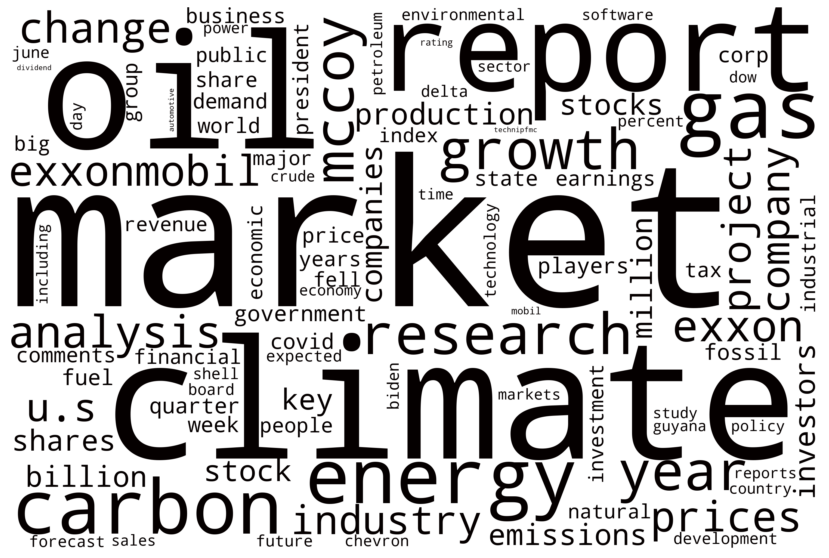

In [47]:
def black_color_func(word, font_size, position, orientation, random_state = None, **kwargs):
    return("hsl(0,100%, 1%)")

class color:
    BOLD = '\033[1m'
    END = '\033[0m'
    
keywords_list = []
weights_list = []

n_comp = 10
for k in range(n_comp):         
    q = QueryArticles(conceptUri = er.getConceptUri(comp[k]), lang = "eng", dataType = ['news','pr'])
    q.setRequestedResult(RequestArticlesKeywordAggr(articlesSampleSize = 5000))
    res2 = er.execQuery(q)
    
    print("------ {} ------".format(comp[k]))
    
    keywords = []
    weights = []
    r = re.compile(r'[a-zA-Z].*')
    l = res2['keywordAggr']['results']

    for i in range(len(l)):
        key = l[i]['keyword']
        wt = l[i]['weight']
    
        a = r.search(key)
        if(a != None):
            keywords.append(key) 
            weights.append(wt)
            
    d = {}
    for i in range(len(keywords)):
        d[keywords[i]] = weights[i]
    
    wordcloud = WordCloud(background_color = "white", width = 3000, height = 2000).generate_from_frequencies(d)
    wordcloud.recolor(color_func = black_color_func)
    plt.figure(figsize = [15,10])
    plt.imshow(wordcloud, interpolation = "bilinear")
    plt.axis("off")
    
    s = ''
    s = comp[k] + '_Keywords_image.png'
    
    plt.savefig(s)
    
    print(color.BOLD + "Top 10 Keywords - {} ".format(comp[k]) + color.END)
    
    for i in range(10):
        print(keywords[i])
    keywords_list.append(keywords) 
    weights_list.append(weights)

In [48]:
b = []
for i in range(n_comp):
    a = keywords_list[i]
    w = weights_list[i]
    
    d = {}
    for j in range(len(a)):
        d[j] = [a[j],w[j]]
    d['Company'] = comp[i]
    d['Rank'] = rank[i]
    
    b.append(d)

out_file = open("TopKeywords_1.json", "w") 
json.dump(b, out_file, indent = 6) 
out_file.close()